<a href="https://colab.research.google.com/github/manuemmanuel/Python-class/blob/main/Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module -2 (Building Python Programs) (8 hours)**


Strings and text files – Accessing characters, substrings, Data encryption, Strings and number system, String methods, Text files,

A case study on text analysis.


Design with Functions – Functions as Abstraction Mechanisms, Problem solving with top-down design, Design with recursive functions, Managing a program’s namespace, Higher-Order Functions.


Lists - Basic list Operations and functions, List of lists, Slicing, Searching and sorting list, List comprehension.


Work with tuples. Sets. Work with dates and times, A case study with lists.


Dictionaries -Dictionary functions, dictionary literals, adding and removing keys, accessing and replacing values, traversing dictionaries, reverse lookup.


Case Study – Data Structure Selection.

# Strings

#1. Accessing Characters and Substrings
You can access specific characters or portions of a string using indexing and slicing.


**Accessing Characters**

In [ ]:
text = "Hello, World!"
print(text[0])   # Output: H (1st character)
print(text[-1])  # Output: ! (last character)
print(text[7])   # Output: W (8th character)


H
!
W


**Accessing Substrings**

In [ ]:
text = "Hello, World!"
print(text[0:5])  # Output: Hello (characters from index 0 to 4)
print(text[7:])   # Output: World! (from index 7 to the end)
print(text[:5])   # Output: Hello (first 5 characters)


Hello
World!
Hello


**Skipping Characters in Substrings**

Slicing also allows specifying a step to skip characters.

Slicing Syntax with Step

    substring = text[start:end:step]

step: Specifies how many characters to skip. Default is 1.


In [ ]:
text = "PythonProgramming"

# Substring with every 2nd character
print(text[0:10:2])  # Output: PtoPo

# Reversing the string
print(text[::-1])  # Output: gnimmargorPnohtyP


PtoPo
gnimmargorPnohtyP


**Checking if a Character or Substring Exists**

You can use the **in** and **not** in operators to check for the presence of a character or substring.

In [ ]:
text = "PythonProgramming"

# Check if a character exists
print("P" in text)      # Output: True
print("Z" in text)      # Output: False

# Check if a substring exists
print("Pro" in text)    # Output: True
print("Java" not in text)  # Output: True


True
False
True
True


## **Cryptography:**

#Encryption:

Encryption is the process of encoding the data. i.e converting plain text into ciphertext. This conversion is done with a key called an encryption key.

#Decryption:

Decryption is the process of decoding the encoded data. Converting the ciphertext into plain text. This process requires a key that we used for encryption.

We require a key for encryption. There are two main types of keys used for encryption and decryption. They are Symmetric-key and Asymmetric-key.

#Symmetric-key Encryption:

In symmetric-key encryption, the data is encoded and decoded with the same key.

Install the python cryptography library with the following command.

In [ ]:
pip install cryptography

Fernet is a symmetric encryption method that uses the same key for both encryption and decryption.

In [ ]:
from cryptography.fernet import Fernet
import base64

# Step 1: Alice's Role - Key creation and encryption
print("\n--- Alice's Role ---")
custom_text = input("Alice, enter your custom key (any text to share with Bob): ")

# Ensure the custom key is exactly 32 bytes (pad or trim is done to make it 32 bytes)
custom_text_32bytes = custom_text.ljust(32)[:32]  # Pad with spaces or trim to 32 characters
# Encode as Base64 (fernet key must be 32 url-safe base64-encoded bytes.)
custom_key = base64.urlsafe_b64encode(custom_text_32bytes.encode())

print("\nGenerated Custom Key (to be securely shared with Bob):", custom_key)

# Alice encrypts a message
cipher_alice = Fernet(custom_key)
message = input("\nAlice, enter the message to encrypt: ").encode()  # Convert to bytes
encrypted_message = cipher_alice.encrypt(message)

print("\nEncrypted Message (Alice sends this to Bob):", encrypted_message)

# Show Visual Representation After Encryption
print("\n--- Visual Representation After Encryption ---")
print("""
+-----------------+                 +-----------------+
|                 |   Encrypted     |                 |
|     Alice       |   Message --->  |      Bob        |
|                 |                 |                 |
+-----------------+                 +-----------------+

              Custom Key (Shared Secret)
""")

# Step 2: Bob's Role - Decryption
print("\n--- Bob's Role ---")
bob_custom_text = input("Bob, enter the shared custom key from Alice: ")

# Ensure Bob creates the same Fernet-compatible key
bob_custom_text_32bytes = bob_custom_text.ljust(32)[:32]  # Pad or trim to 32 characters
bob_custom_key = base64.urlsafe_b64encode(bob_custom_text_32bytes.encode())  # Encode as Base64

# Bob creates a cipher with the key
cipher_bob = Fernet(bob_custom_key)

# Bob decrypts the received encrypted message
decrypted_message = cipher_bob.decrypt(encrypted_message).decode()  # Convert back to string

print("\nDecrypted Message (Bob reads):", decrypted_message)




--- Alice's Role ---
Alice, enter your custom key (any text to share with Bob): 1234567

Generated Custom Key (to be securely shared with Bob): b'MTIzNDU2NyAgICAgICAgICAgICAgICAgICAgICAgICA='

Alice, enter the message to encrypt: hai how r u

Encrypted Message (Alice sends this to Bob): b'gAAAAABnkgs4dJT0tVFjUGqdPCBntGlaKch5YBJynS4GS1SpPk_b4TY9FiqHmOl1--d4jKiQDnp-c5v58htsY7yK0mxf8xeYsQ=='

--- Visual Representation After Encryption ---

+-----------------+                 +-----------------+
|                 |   Encrypted     |                 |
|     Alice       |   Message --->  |      Bob        |
|                 |                 |                 |
+-----------------+                 +-----------------+

              Custom Key (Shared Secret)


--- Bob's Role ---
Bob, enter the shared custom key from Alice: 1234567

Decrypted Message (Bob reads): hai how r u


#Asymmetric-key Encryption:

In Asymmetric-key Encryption, we use two keys a public key and a private key. The public key is used to encrypt the data and the private key is used to decrypt the data. By the name, the public key can be public (can be sent to anyone who needs to send data). No one has your private key, so no one in the middle can read your data.


Example: RSA

Install the python rsa library with the following command.

    pip install rsa

In [ ]:
pip install rsa


#Steps in RSA

*   Import rsa library
*   Generate public and private keys with rsa.newkeys() method.
*   Encode the string to byte string.
*   Then encrypt the byte string with the public key.
*   Then the encrypted string can be decrypted with the private key.
*   The public key can only be used for encryption and the private can only be used for decryption.

In [ ]:
import rsa

# generate public and private keys with
# rsa.newkeys method,this method accepts
# key length as its parameter
# key length should be atleast 16
publicKey, privateKey = rsa.newkeys(512)

# this is the string that we will be encrypting
message = "Hi jikkku "

# rsa.encrypt method is used to encrypt
# string with public key string should be
# encode to byte string before encryption
# with encode method
encMessage = rsa.encrypt(message.encode(),
                         publicKey)

print("original string: ", message)
print("encrypted string: ", encMessage)

# the encrypted message can be decrypted
# with ras.decrypt method and private key
# decrypt method returns encoded byte string,
# use decode method to convert it to string
# public key cannot be used for decryption
decMessage = rsa.decrypt(encMessage, privateKey).decode()

print("decrypted string: ", decMessage)


original string:  Hi jikkku 
encrypted string:  b'U\xba\xe0|\x99L\xa6V\x95v\xaf\xb7bQS8D\xbb(\xf3j9\xa8n\x8b\xfawZ\x06\x12\xbb\x99\x01*nGd\x8d/\xb8\x97j\xf6\xe2\xc9\xb9\x94\x163\xce\xfe\xf6\x16\r\xa1D\xbd{n\xf0\xcc\xa5<\x13'
decrypted string:  Hi jikkku 


# **Hash**

A hash is a function that converts input data of any size into a fixed-length string of characters, typically a sequence of numbers and letters. The output of this function is called the hash value, digest, or hash code.


Common Hash Algorithms

MD5: Produces a 128-bit hash; now considered weak due to vulnerabilities.

SHA-1: Produces a 160-bit hash; deprecated due to collision attacks.

SHA-256: A member of the SHA-2 family; widely used for security and integrity.

SHA-3: The latest standard, with enhanced security features.

In [ ]:
# Python program to demonstrate hashing

# Define a string
input_string = "Hello,world!"

# Hash the string using Python's built-in hash() function
hash_value = hash(input_string)

# Print the original string and its hash value
print("Original String:", input_string)
print("Hash Value:", hash_value)


Original String: Hello,world!
Hash Value: 7754825460192256216


#**Tutorial**

Write a Python program to compute the SHA-256 hash of a file named example.txt. Assume the file contains some text data.

Your program should:

1. Open the file in binary mode.

2. Compute the hash using the hashlib module.

3. Print the SHA-256 hash value of the file.

# **Strings and Number System**


Strings in Python can represent textual data and also be used to work with numbers in different bases.


Number System in Strings


Strings can represent numbers in various bases, such as binary, octal, decimal, and hexadecimal.

Use the int() function to convert strings of different bases into decimal integers:

In [ ]:
binary = "1010"
decimal = int(binary, 2)  # Binary to decimal
print(decimal)  # Output: 10

hexadecimal = "1F"
decimal = int(hexadecimal, 16)  # Hexadecimal to decimal
print(decimal)  # Output: 31


10
31


To convert integers back to different bases:

1. bin(): Convert to binary.
2. oct(): Convert to octal.
3. hex(): Convert to hexadecimal.



In [ ]:
num = 10
print(bin(num))  # Output: 0b1010
print(oct(num))  # Output: 0o12
print(hex(num))  # Output: 0xa


0b1010
0o12
0xa


#**String methods**

String methods are built-in functions in programming languages that allow you to manipulate, analyze, and format strings. Here's an overview of commonly used string methods in Python:

**1. Case Conversion**

.lower(): Converts all characters to lowercase.

    Example: "HELLO".lower() → 'hello'

.upper(): Converts all characters to uppercase.

    Example: "hello".upper() → 'HELLO'

.capitalize(): Capitalizes the first character of the string.

    Example: "hello world".capitalize() → 'Hello world'

.title(): Capitalizes the first character of each word.

    Example: "hello world".title() → 'Hello World'

.swapcase(): Swaps uppercase to lowercase and vice versa.

    Example: "HeLLo WoRLd".swapcase() → 'hEllO wOrlD'

2. Whitespace Handling

.strip(): Removes leading and trailing whitespace.

    Example: " hello ".strip() → 'hello'

.lstrip(): Removes leading whitespace.
    
    Example: " hello ".lstrip() → 'hello '

.rstrip(): Removes trailing whitespace.
    
    Example: " hello ".rstrip() → ' hello'

#**3. Search and Replace**

.find(substring): Returns the first index of the substring. Returns -1 if not found.
    
    Example: "hello".find("l") → 2

.index(substring): Similar to .find(), but raises an error if the substring is not found.
    
    Example: "hello".index("l") → 2

.replace(old, new): Replaces occurrences of a substring with another substring.
    
    Example: "hello world".replace("world", "Python") → 'hello Python'

.count(substring): Counts occurrences of a substring.
    
    Example: "hello".count("l") → 2

#**4. String Formatting**


.join(iterable): Joins elements of an iterable (like a list) into a string.
    
    Example: ",".join(["a", "b", "c"]) → 'a,b,c'

.split(separator): Splits a string into a list based on a separator.
    
    Example: "a,b,c".split(",") → ['a', 'b', 'c']

.partition(substring): Splits a string into three parts: before, the match, and after.
    
    Example: "hello world".partition(" ") → ('hello', ' ', 'world')

.format(): Formats strings using placeholders.
    
    Example: "Hello, {}!".format("Alice") → 'Hello, Alice!'

f-strings: A newer and more readable way to format strings.

    Example: name = "Alice"; f"Hello, {name}!" → 'Hello, Alice!'

#**5. Validation**


.isalnum(): Checks if all characters are alphanumeric.

    Example: "abc123".isalnum() → True

.isalpha(): Checks if all characters are alphabetic.
    
    Example: "abc".isalpha() → True

.isdigit(): Checks if all characters are digits.
    
    Example: "123".isdigit() → True

.isspace(): Checks if the string contains only whitespace.
    
    Example: " ".isspace() → True

.startswith(prefix): Checks if the string starts with a specific substring.
    
    Example: "hello".startswith("he") → True

.endswith(suffix): Checks if the string ends with a specific substring.
    
    Example: "hello".endswith("lo") → True

**#6. Miscellaneous**

.len(): Returns the length of the string.
    
    Example: len("hello") → 5

.zfill(width): Pads the string with zeros on the left to fill the specified width.
Example: "42".zfill(5) → '00042'



#***Tutorial:***

Get Input from the User
Write a program that asks the user to input a sentence.

Perform the Following Operations Using String Methods:

a. Convert the string to uppercase and lowercase, and print the results.

b. Find and print the length of the string.

c. Count how many times the word "the" (case-insensitive) appears in the string.

d. Check if the string ends with a punctuation mark (e.g., ., !, ?). Print True
or False.

e. Replace all spaces with a hyphen (-) and print the modified string.

f. Extract and print the first word from the string.

# **3. Text Files**

Python provides tools to work with text files for reading and writing.

**Reading from a Text File**

Open the file in read mode ('r') and use methods like read() or readlines().

In [ ]:
with open("jikku.txt", "r") as file:
    content = file.read()
    print(content)


HAI    H R UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU


**Writing to a Text File**

Open the file in write mode ('w') or append mode ('a').

In [ ]:
with open("jikku.txt", "a") as file:
    file.write("This is a new line.\n")
    file.write("Another line.\n")
with open("jikku.txt", "r") as file:
    content = file.read()
    print(content)


This is a new line.
Another line.
This is a new line.
Another line.
This is a new line.
Another line.
This is a new line.
Another line.



In [ ]:
capture
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

print("Google Drive is mounted!")

In [ ]:
!pip install Pillow


In [ ]:
!pip install matplotlib


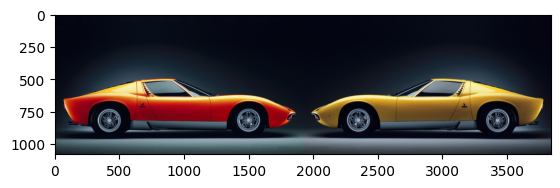

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Open an image file
image_path = "/content/drive/MyDrive/Photo/cars.jpg"  # Provide the full path to the image file
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('on')  # Optional: Hide axes for better view
plt.show()

**Tutorial Question:**

File Management in Google Drive

1. Mount Google Drive:

Mount your Google Drive to access files stored there. Provide a message when the Drive is successfully mounted.

2. Upload a File:

Upload a file from your local machine to the root of your Google Drive.

3. Access and Display a File:

After uploading, access the file in your Google Drive and display its path.

4. Download the File:

Finally, download the file back to your local machine from Google Drive.

#**Function**

A function in Python is a reusable block of code designed to perform a specific task. Functions help organize code, reduce repetition, and enhance readability and maintainability.



Syntax

    def function_name(parameters):
        """
        Optional docstring to describe the function.
        """
        # Function body (logic)
        return result  # Optional


**Key Elements of a Python Function**

1. Function Name:

Identifier for the function, following standard naming conventions.
Parameters:

Variables passed to the function to provide input data.


2. Parameters:

Variables passed to the function to provide input data.

In [ ]:
def add(a, b):
    return a + b


3. Function Body:

The code inside the function that defines its behavior.

4. Return Statement:

Allows the function to send a result back to the caller.


In [ ]:
def square(number):
    return number ** 2

result = square(10)
print(result)  # Output: 16


100




---



1. Function Without Parameters and no return value

In [ ]:
def greet():
  print("Hello, world!")


print(greet())  # Output: Hello, world!  (to return )


Hello, world!
None


2. Function With Parameters

In [ ]:
# parameters
def greet(first_name , last_name):
  """Prints a greeting message with the provided name."""
  print(f"Hello, {first_name} {last_name}!")

greet("jikku", "thomas")
greet("thomas", "joe")
print(greet("joe", "thomas"))

Hello, jikku thomas!
Hello, thomas joe!
Hello, joe thomas!
None


In [ ]:
# with return
def calculate_tax(income, tax_rate):
    return income * tax_rate


In [ ]:
# Usage

x = (calculate_tax(50000, 0.25))
print (x)

12500.0


In [ ]:
# Function definition
def greet(first_name, last_name):
    """Returns a greeting message with the provided name."""
    return f"Hello, {first_name} {last_name}!"

# Generate the message
message = greet("jikku", "thomas")

# Write the message to a file
with open("jikku.txt", "a") as file:
    file.write(message)


# **Types of Functions**

1. Built-in Functions


Python provides many built-in functions like len(), sum(), print(), etc.

In [ ]:
numbers = [1, 2, 3, 4]
print(sum(numbers))  # Output: 10


10


2. User-Defined Functions

Functions created by the programmer for specific use cases.

In [ ]:
def multiply(a, b):
    return a * b

print(multiply(3, 4))  # Output: 12


12


3. Lambda Functions (Anonymous Functions)

Single-expression functions defined using the lambda keyword.

Lambda functions in Python are anonymous functions, meaning they don’t have a name. They are often used for short, simple operations that can be expressed in a single expression. The syntax for a lambda function is:

    lambda arguments: expression


In [ ]:
square = lambda x: x ** 2
print(square(5))  # Output: 25


25


4. Recursive Functions

Functions that call themselves to solve smaller instances of a problem.

In [ ]:
def print_numbers(n):
    """Print numbers from n to 1 using recursion."""
    if n > 0:  # Base case
        print(n)            # Print statement before recursion
        print_numbers(n - 1)  # Recursive call

# Test the function
print_numbers(5)


5
4
3
2
1


**Assignment :Recursive Functions  (factorial of a number )**

1. Encapsulation

A function groups related logic into a single unit, which can then be reused wherever required. This prevents code duplication and keeps the implementation details hidden.

In [ ]:
def calculate_area(length, width):
    return length * width

# Usage
area = calculate_area(5, 10)
print(f"The area is {area}")


The area is 50


2. Reusability

Once a function is written, it can be reused multiple times without rewriting the code.


In [ ]:
def greet_user(name):
    print(f"Hello, {name}!")

In [ ]:
greet_user("Alice")
greet_user("Bob")
greet_user("Charlie")
greet_user("David")

Hello, Alice!
Hello, Bob!
Hello, Charlie!
Hello, David!


3. Hiding Implementation Details

Functions enable you to hide how a task is performed while exposing a simple interface for the user.

Example: Suppose you want to fetch data from a database, but you don't want the user to worry about connection details.

In [ ]:
def convert_to_celsius(fahrenheit):
    """Convert Fahrenheit to Celsius (hides formula details)."""
    return (fahrenheit - 32) * 5 / 9

# Using the function
temperature_f = 98.6
temperature_c = convert_to_celsius(temperature_f)
print(f"{temperature_f}°F is equivalent to {temperature_c:.2f}°C.")


98.6°F is equivalent to 37.00°C.


3. Modularity Through Smaller Functions

Breaking down a large problem into smaller functions makes it easier to manage, debug, and test.

In [ ]:
# Breaking a task into logical parts
def input_data():
    return input("Enter your name: ")

def process_data(name):
    return name.strip().capitalize()

def output_data(name):
    print(f"Hello, {name}!")

# Main program
name = input_data()
processed_name = process_data(name)
output_data(processed_name)


Enter your name: jikku
Hello, Jikku!


4. Higher-Order Abstraction

A Higher-Order Function is a function that either:

1. Takes one or more functions as arguments, or
2. Returns a function as a result.

In Python, higher-order functions allow for greater flexibility and abstraction by enabling functions to accept other functions as input and/or return functio


**Example**: Passing Functions as Arguments

In [ ]:
def apply_operation(a, b, operation):
    return operation(a, b)  #operation refers to a function that takes two arguments and performs a specific calculation or action

def add(x, y):
    return x + y

def multiply(x, y):
    return x * y

print(apply_operation(3, 5, add))       # Output: 8
print(apply_operation(3, 5, multiply))  # Output: 15


8
15


**Example** : Returns a function as a result.


In [ ]:
# Outer function that returns an inner function
def outer(x):
    def inner(y):
        return x + y  # Inner function uses variable x from outer function
    return inner  # Return the inner function

# Create a new function that adds 10 to any number
add_10 = outer(10)

# Call the new function
print(add_10(5))  # Output: 15


15


Assignment

Question:

Write a Python program that performs the following tasks:


1. Asks the user for their name and their marks in Physics, Chemistry, and Mathematics.

2. Defines a function that takes the marks of the three subjects as input and
calculates the average marks.

3. Displays the calculated average marks along with the student's name.


Assignment

Question:

1. Write a Python program that performs the following tasks:

2. Asks the user for their name and their marks in Physics, Chemistry, and Mathematics.

3. Defines a function that takes the marks of the three subjects as input and calculates the average marks.

4. Generates a report card for the student and saves it to a text file with the name format: student_name_report_card.txt.

5. The report card should include the student's name, marks in Physics, Chemistry, and Mathematics, and their average marks.

In [ ]:
# Function to calculate the average marks
def calculate_average(physics, chemistry, maths):
    """Calculate the average of the three subjects."""
    return (physics + chemistry + maths) / 3

# Main program
name = input("Enter your name: ")
physics = float(input("Enter your Physics marks: "))
chemistry = float(input("Enter your Chemistry marks: "))
maths = float(input("Enter your Mathematics marks: "))


# Calculate the average using the function
average = calculate_average(physics, chemistry, maths)

# Display the result
print(f"\n{name}, your average marks are: {average:.2f}")

In [ ]:
# Function to calculate the average marks
def calculate_average(physics, chemistry, maths):
    """Calculate the average of the three subjects."""
    return (physics + chemistry + maths) / 3

# Main program
name = input("Enter your name: ")
physics = float(input("Enter your Physics marks: "))
chemistry = float(input("Enter your Chemistry marks: "))
maths = float(input("Enter your Mathematics marks: "))

# Calculate the average using the function
average = calculate_average(physics, chemistry, maths)

# Prepare the report card content
report_card_content = f"""
Report Card
------------
Name: {name}
Physics Marks: {physics}
Chemistry Marks: {chemistry}
Mathematics Marks: {maths}
Average Marks: {average:.2f}
"""

# Generate a file name based on the student's name
file_name = f"{name}_report_card.txt"

# Write the report card to the file
with open(file_name, "w") as file:
    file.write(report_card_content)

# Inform the user that the report card has been generated
print(f"\n{name}, your report card has been generated as {file_name}.")8

Enter your name: anu
Enter your Physics marks: 89
Enter your Chemistry marks: 90
Enter your Mathematics marks: 90

anu, your report card has been generated as anu_report_card.txt.


# **Higher-order function**

A higher-order function is a function that meets one or both of the following criteria:

1. It takes one or more functions as arguments.
2. It returns a function as its result.

Higher-order functions are widely used in functional programming and can make code more flexible and reusable. Many programming languages, like Python, JavaScript, and Haskell, have built-in support for higher-order functions.

In [ ]:
def add(a, b):
    return a + b

result = add(5,4)
print (result)
print(add)
sum = add
print(sum)
print(sum(5,5))

9
<function add at 0x7d9f5c237e20>
<function add at 0x7d9f5c237e20>
10


1. **It takes one or more functions as arguments.**

In [ ]:
def apply_operation(a, b, operation):
    return operation(a, b)  #operation refers to a function that takes two arguments and performs a specific calculation or action

def add(x, y):
    return x + y

def multiply(x, y):
    return x * y

print(apply_operation(3, 5 , add))       # Output: 8
print(apply_operation(3, 5, multiply))  # Output: 15

8
15


Higher-Order Function: apply_operation

Regular Functions: add, multiply

**2. It returns a function as its result.**

In [ ]:
def create_adder(x):
    def adder(y):
        return x + y

    return adder

add_15 = create_adder(15)  # x = 15
print(add_15(10))        # y = 10 and return x+y to add_10

          # Output: 25


25


Higher-Order Function: create_adder(x)

Regular Function: adder(y) (the function returned by create_adder).


#create_adder(15):

When you call create_adder(15), it creates and returns the adder(y) function.

The adder function remembers the value of x (which is 15 in this case), as x is part of the closure.

So, when add_15 = create_adder(15) is executed, add_15 becomes the adder(y) function where x = 15 is fixed (due to the closure).


#add_15(10):

Now, add_15 is the function adder(y) with x = 15 already set.

When add_15(10) is called, it passes y = 10 to adder(y).

The adder function computes x + y, which is 15 + 10 = 25.

# Functions as Abstraction Mechanisms

Functions can serve as powerful abstraction mechanisms in programming. Abstraction in programming is the concept of hiding complex details and exposing only the essential parts of a system. Functions help achieve abstraction by allowing you to:


1. Hide Implementation Details:

    You can encapsulate complex logic inside a function, so the user does not need to understand how the logic works; they only need to know what the function does.

2. Create Reusable Components:

    Functions allow you to write code once and reuse it whenever needed, which reduces redundancy and enhances maintainability.

3. Modularize Code:

    By breaking down a program into smaller, self-contained functions, you can make the code more organized, readable, and easier to maintain.

4. Improve Code Readability and Maintainability:

    Well-named functions can act as a form of self-documentation, making it clear what each part of the code does without needing to dig into the details.


# Problem Solving with Top-Down Design in Python

Top-down design (also known as stepwise refinement) is a problem-solving approach where you begin by breaking down a complex problem into smaller, more manageable sub-problems. These sub-problems are then further divided until they become simple enough to be solved directly.

In the context of programming, top-down design involves:


1. Starting with the high-level problem or task.

2. Dividing the task into smaller functions.

3. Writing code for each function progressively.

Let's look at a slightly more complex example using top-down design: Calculating the total cost of a shopping cart including tax and applying a discount.

**Problem:**

We want to compute the total cost of items in a shopping cart.
We need to:

1.Calculate the total price of all items.

2.Apply a discount.

3.Calculate tax on the discounted price.

4.Return the final amount after applying the discount and tax.

Top-Down Design:

High-level problem: Calculate the final total cost of items in the cart.

Sub-problems:

Calculate total price: Sum all item prices.

*   Calculate total price:
      
        Sum all item prices.

*   Apply discount:
      
        Subtract a discount percentage from the total price.

*   Calculate tax:
      
         Compute the tax based on the discounted price.

*   Return the final amount:
      
          Add the tax to the discounted price.


In [ ]:
# Step 1: Function to calculate the total price of items
def calculate_total(prices):
    return sum(prices)  # Sum up all the item prices in the list

# Step 2: Function to apply a discount to the total price
def apply_discount(total_price, discount_rate):
    return total_price * (1 - discount_rate)  # Subtract the discount rate from total price

# Step 3: Function to calculate tax on the discounted price
def calculate_tax(discounted_price, tax_rate):
    return discounted_price * tax_rate  # Calculate the tax based on the discounted price

# Step 4: Main function to compute the final amount
def calculate_final_amount(prices, discount_rate, tax_rate):
    total_price = calculate_total(prices)  # Step 1: Get total price
    discounted_price = apply_discount(total_price, discount_rate)  # Step 2: Apply discount
    tax = calculate_tax(discounted_price, tax_rate)  # Step 3: Calculate tax
    final_amount = discounted_price + tax  # Step 4: Add tax to discounted price
    return final_amount

# Example usage
prices = [100, 200, 300]  # Prices of items in the cart
discount_rate = 0.1  # 10% discount
tax_rate = 0.05  # 5% tax rate

final_amount = calculate_final_amount(prices, discount_rate, tax_rate)
print(f"The final amount after discount and tax is: {final_amount}")



# Top-Down Design:


1. calculate_total(prices):

    This function takes a list of item prices and returns the sum of the prices.

2. apply_discount(total_price, discount_rate):

    This function applies a discount on the total price. It returns the price after applying the discount.

3. calculate_tax(discounted_price, tax_rate):

    This function calculates the tax on the discounted price. It multiplies the discounted price by the tax rate to return the tax amount.

4. calculate_final_amount(prices, discount_rate, tax_rate):

    This is the main function that coordinates the overall process. It first calls calculate_total() to calculate the total price of the items. Then, it applies the discount using apply_discount(). Finally, it computes the tax using calculate_tax() and returns the final amount to be paid by the customer.

#**Design with recursive functions**

Recursive Functions Design

A recursive function is a function that calls itself in order to solve a problem. Recursive functions are useful when a problem can be broken down into smaller, similar subproblems. The key components of a recursive function are:

1. Base Case: The condition under which the function stops calling itself and begins returning values.
2. Recursive Case: The part where the function calls itself to solve smaller instances of the problem.

In [ ]:
def print_numbers(n):
    """Print numbers from n to 1 using recursion."""
    if n > 0:  # Base case
        print(n)            # Print statement before recursion
        print_numbers(n - 1)  # Recursive call

# Test the function
print_numbers(5)

5
4
3
2
1


#Managing a Program's Namespace in Python


In Python, namespaces refer to the container in which names (identifiers) are mapped to objects. These namespaces ensure that the same name can be used in different parts of a program without causing conflicts. In essence, a namespace allows you to manage how variables, functions, and objects are named and accessed throughout the program.


Python manages namespaces at different levels, such as global, local, enclosing, and built-in.

1. Global Namespace: Variables or functions declared outside any function or class.
2. Local Namespace: Variables declared inside a function.
3. Enclosing Namespace: Variables in the enclosing (outer) function.
4. Built-in Namespace: Python's built-in functions and exceptions.

10 5


In [ ]:
#Global and Local Namespaces

  x = 10  # Global variable

def func():
    y = 5  # Local variable
    print(x, y)

func()  # Output: 10 5


10 5


In this example, there are two variables:

1. Global variable x: Declared outside the function, it can be accessed from anywhere in the script.

2. Local variable y: Declared inside the function func(), it can only be accessed within that function.

When func() is called, the program prints the values of both x (the global variable) and y (the local variable):

    x is globally defined as 10.

    y is locally defined as 5 within the function.

In [ ]:
# Global and Local Namespaces

x = 10  # Global variable

def func1():
  x = 20  # This `x` is local to `func1()`

def func():
    y = 5  # Local variable inside func
    print(x, y)  # Prints the global `x` and local `y`

func()  # Output: 10 5


10 5


#Enclosing Namespace

In Python, an enclosing namespace refers to the scope of an outer function that contains inner (nested) functions.

These inner functions can access variables defined in the outer function’s scope, even if those variables are not passed explicitly.

This behavior is a result of **lexical scoping,**

In [ ]:
def outer():
    x = 20  # Enclosing variable
    def inner():
        print(x)  # Access enclosing variable `x`
    inner()

outer()# Output: 20
#inner()  #name 'inner' is not defined because the function inner() is defined within the scope of the function outer()


20


# **Built-in namespace**

In Python, the built-in namespace refers to the collection of objects (functions, classes, exceptions, etc.) that are always available for use in Python programs. These objects are part of the Python Standard Library and do not require any explicit import to be used. They are accessible throughout the entire program.


**Components of the Built-in Namespace:**

Built-in Functions: Python provides a wide range of functions that can be used directly.

Some of these functions are:

1. print() — Outputs text to the console.

2. len() — Returns the length of an object (e.g., list, string).

3. type() — Returns the type of an object.

4. max() — Returns the largest item from an iterable or among two or more arguments.

5. min() — Returns the smallest item from an iterable or among two or more arguments.

6. range() — Generates a sequence of numbers.

**Exceptions:**

Python includes a set of built-in exceptions to handle various
error conditions.
For example:

1. IndexError — Raised when trying to access an index that is out of range.

2. TypeError — Raised when an operation or function is applied to an object of inappropriate type.
3. ValueError — Raised when a function receives an argument of the correct type but inappropriate value.
4. KeyError — Raised when a dictionary key is not found.



**Built-in Constants:**

Python includes some constants as part of the built-in namespace:

1. True — Boolean value representing truth.

2. False — Boolean value representing falsity.

3. None — Represents the absence of a value or a null value.


**Built-in Classes:**

Some built-in classes are always available in Python, such as:

1. int — The integer class.
2. str — The string class.
3. list — The list class.
4. dict — The dictionary class.
5. tuple — The tuple class.

# Lists - Basic list Operations and functions

In Python, lists are one of the most commonly used data types.

They are ordered collections of items, which can be of any data type (e.g., integers, strings, other lists, etc.).

Lists are mutable, meaning that their elements can be changed after the list is created.

1. Characteristics of a List

✅ Ordered → The elements maintain the order in which they were inserted.

✅ Mutable → Lists can be modified (add, remove, or change elements).

✅ Heterogeneous → Can store elements of different data types (integers, strings, floats, objects, etc.).

✅ Allows Duplicates → Multiple occurrences of the same element are allowed.

✅ Supports Indexing & Slicing → You can access elements using an index and extract sublists.



**Creating Lists**

A list can be created by placing items inside square brackets [ ], separated by commas.

In [ ]:
# Creating a list
my_list = [1, 2, 3, 4, 5]

print (my_list)



[1, 2, 3, 4, 5]


**Basic List Operations and Functions**

Here are some basic operations and functions that can be used with lists:

**1. Accessing List Elements**

    You can access list elements using indexing. The index starts from 0 for the first element.

In [ ]:
my_list = [1, 2, 3, 4, 5]

# Print the entire list
print(my_list)  # Output: [1, 2, 3, 4, 5]

# Access the first element (index 0)
print(my_list[0])  # Output: 1

# Access the fourth element (index 3)
print(my_list[3])  # Output: 4

# Access the last element (using negative indexing)
print(my_list[-1])  # Output: 5

# Print the entire list
print(my_list)  # Output: [1, 2, 3, 4, 5]


[1, 2, 3, 4, 5]
1
4
5
[1, 2, 3, 4, 5]


**2. Slicing a List**

You can slice lists to get a sublist (a portion of the list).

In [ ]:
my_list = [1, 2, 3, 4, 5]

print(my_list[1:4])   # Slice from index 1 to 3 (Output: [2, 3, 4])
                      # 👉 Rule: list[start:end] extracts elements from start to end-1 (not including end).
                      # 👉 my_list[1:4] means :Start at index 1 → 2 ,Stop before index 4 →
                      # 👉 So it includes 2, 3, 4, but not 5
print(my_list[:3])    # Slice from the beginning to index 2 (Output: [1, 2, 3])
print(my_list[2:])    # Slice from index 2 to the end (Output: [3, 4, 5])


[2, 3, 4]
[1, 2, 3]
[3, 4, 5]


**3. Modifying List Elements**

Lists are mutable, meaning you can change their elements by accessing them using indexing.

In [ ]:
my_list = [1, 2, 3, 4, 5]

my_list[2] = 10  # Change the third element
print(my_list)   # Output: [1, 2, 10, 4, 5]


[1, 2, 10, 4, 5]


**4. Adding Elements to a List**

You can add elements to a list using methods like append(), insert(), or extend().

    append(): Adds an element to the end of the list.

    insert(): Inserts an element at a specific position.

    extend(): Adds all elements from another iterable (list, tuple, etc.) to the list.



In [ ]:
my_list = [1, 2, 3]

# append() adds an element to the end
my_list.append(4)
print(my_list)  # Output: [1, 2, 3, 4]

# insert() adds an element at a specific position (index 1)
my_list.insert(1, 10)
print(my_list)  # Output: [1, 10, 2, 3, 4]



[1, 2, 3, 4]
[1, 10, 2, 3, 4]


In [ ]:
# extend() adds multiple elements from another iterable
my_list = [1, 2, 3]
my_list2 = [4, 5, 6]
my_list.extend(my_list2)
print(my_list)  # Output: [1, 2, 3, 4, 5, 6]
my_tuple = (4, 5, 6)
my_list.extend(my_tuple)
print(my_list)

[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 4, 5, 6]


**5. Removing Elements from a List**


You can remove elements from a list using remove(), pop(), or del.

1. remove(): Removes the first occurrence of a specific value.

2. pop(): Removes an element at a specific index (or the last element if no index is given) and returns it.

3. del: Deletes an element at a specific index or can be used to delete the entire list.

In [ ]:
my_list = [1, 2, 3, 4, 5,3]

# remove() removes the first occurrence of a specific value
my_list.remove(3)
print(my_list)  # Output: [1, 2, 4, 5]


# pop() removes and returns the element at the specified index (or the last element if no index is provided)
removed_element = my_list.pop(1)
print(removed_element)  # Output: 2

print(my_list)  # Output: [1, 4, 5]

# del deletes an element at a specific index
del my_list[0]
print(my_list)  # Output: [4, 5]

# del can also delete the entire list
del my_list


[1, 2, 4, 5, 3]
2
[1, 4, 5, 3]
[4, 5, 3]


**6. Finding the Length of a List**

    You can find the number of elements in a list using the len() function.

In [ ]:
my_list = [1, 2, 3, 4, 5]
print(len(my_list))  # Output: 5


5


**7. Checking if an Element Exists in a List**

      You can check if a value exists in the list using the in keyword.

In [ ]:
my_list = [1, 2, 3, 4, 5]
print(3 in my_list)  # Output: True
print(6 in my_list)  # Output: False


True
False


**8. Sorting a List**

  You can sort a list in ascending or descending order using the sort() method (which modifies the list in place) or the sorted() function (which returns a new sorted list).

In [ ]:
my_list = [5, 3, 8, 1, 2]

# sort() sorts the list in place (ascending by default)
my_list.sort()
print(my_list)  # Output: [1, 2, 3, 5, 8]

# sorted() returns a new sorted list without modifying the original list
new_sorted_list = sorted(my_list, reverse=True)
print(new_sorted_list)  # Output: [8, 5, 3, 2, 1]
print(my_list)  # Output: [1, 2, 3, 5, 8]



[1, 2, 3, 5, 8]
[8, 5, 3, 2, 1]
[1, 2, 3, 5, 8]


9. Reversing a List


You can reverse a list using the reverse() method (which modifies the list in place) or the slicing technique

In [ ]:
my_list = [1, 2, 3, 4, 5]

# reverse() reverses the list in place
my_list.reverse()
print(my_list)  # Output: [5, 4, 3, 2, 1]

# Slicing also works to reverse the list
reversed_list = my_list[::-1]
print(reversed_list)  # Output: [1, 2, 3, 4, 5]


[5, 4, 3, 2, 1]
[1, 2, 3, 4, 5]


**10. List Comprehension**

List comprehension is a concise and efficient way to create and modify lists in Python. It replaces traditional loops with a more readable, one-liner approach.

      new_list = [expression for item in iterable if condition]

In [ ]:
# Define the list with some elements, including duplicates of 3
my_list = [1, 2, 3, 4, 5, 3]

# Use list comprehension to create a new list that excludes all occurrences of 3
my_list = [x for x in my_list if x != 3]

# Print the updated list, which no longer contains the number 3
print(my_list)  # Output: [1, 2, 4, 5]




[1, 2, 4, 5]


In [ ]:
fruits = ["apple", "banana", "cherry", "kiwi", "mango"]

newlist = [x for x in fruits if "a" in x]

print(fruits)
print(newlist)


['apple', 'banana', 'cherry', 'kiwi', 'mango']
['apple', 'banana', 'mango']


**Heterogeneous List**

Can store elements of different data types (integers, strings, floats, objects, etc.).

In [ ]:
# Heterogeneous list with multiple data types
heterogeneous_list = [
    42,                      # Integer
    3.14,                    # Float
    "Python",                # String
    True,                    # Boolean
    [1, 2, 3],               # List
    (4, 5, 6),               # Tuple
    {"name": "Alice"},       # Dictionary
    lambda x: x**2           # Function (Lambda)
]
#Accessing the elemets inside the list
print (heterogeneous_list)
print(heterogeneous_list[0])
print(heterogeneous_list[1])
print(heterogeneous_list[2])
print(heterogeneous_list[3])
print(heterogeneous_list[4])
print(heterogeneous_list[5])
print(heterogeneous_list[6])
print(heterogeneous_list[7])


# Accessing the function inside the list (Index 7)
square_function = heterogeneous_list[7]  # Extracting function

# Calling the function with an argument
result = square_function(5)  # 5**2 = 25

print(result)  # Output: 25


[42, 3.14, 'Python', True, [1, 2, 3], (4, 5, 6), {'name': 'Alice'}, <function <lambda> at 0x7efcf47bf060>]
42
3.14
Python
True
[1, 2, 3]
(4, 5, 6)
{'name': 'Alice'}
<function <lambda> at 0x7efcf47bf060>
25
[42, 3.14, 'Python', True, [1, 2, 3], (4, 5, 6), {'name': 'Alice'}, <function <lambda> at 0x7efcf47bf060>]


**Tuples:**

Tuples in Python are immutable, meaning you cannot modify them directly like lists.

👉A tuple is an ordered, immutable collection of elements.

👉Defined using parentheses () or the tuple() constructor.


In [ ]:
my_tuple = (1, 2, 3,4)
print(my_tuple)

(1, 2, 3, 4)


Characteristics of Tuples:

1. Ordered → Elements have a fixed order and can be accessed using an index.

2. Immutable → Cannot be changed (no adding, removing, or modifying elements).

3. Allows Duplicates → Can store repeated values.

4. Can Contain Multiple Data Types → Supports integers, floats, strings, lists, even other tuples.


In [ ]:
mixed_tuple = (1, "Hello", 3.14, [5, 6])
print(mixed_tuple)

(1, 'Hello', 3.14, [5, 6])


**1. Creating Tuples**


In [ ]:
#Single-element tuple (needs a comma!)
single_tuple = (5,)  # Without the comma, Python treats it as an integer
print(single_tuple)

#Tuple without parentheses (Tuple Packing)
my_tuple = 1, 2, 3  # Equivalent to (1, 2, 3)
print(my_tuple)

(5,)
(1, 2, 3)


**2. Accessing Elements in a Tuple**



In [ ]:
#Indexing
my_tuple = (10, 20, 30)
print(my_tuple[1])  # Output: 20
print(my_tuple[-1])  # Output: 30 (last element)

#Slicing
print(my_tuple[1:])  # Output: (20, 30)




20
30
(20, 30)


**3. Tuple Operations**

In [ ]:
#Concatenation (+)
t1 = (1, 2)
t2 = (3, 4)
result = t1 + t2  # Output: (1, 2, 3, 4)
print(result)
#Repetition (*)
t = (1, 2)
result = t * 3  # Output: (1, 2, 1, 2, 1, 2)
print(result)
#Membership Check (in)
print(3 in (1, 2, 3))  # Output: True
print(4 in (1, 2, 3))  # Output: False


(1, 2, 3, 4)
(1, 2, 1, 2, 1, 2)
True
False


**4. Modifying a Tuple**

Since tuples are immutable, you cannot modify them directly.

However, you can convert a tuple to a list, modify it, and convert it back

In [ ]:
my_tuple = (1, 2, 3)
temp_list = list(my_tuple)  # Convert to list
temp_list.append(4)         # Modify list
my_tuple = tuple(temp_list) # Convert back to tuple
print(my_tuple)  # Output: (1, 2, 3, 4)


(1, 2, 3, 4)


**5. Tuple Methods**

count(value) → Returns the number of times a value appears in a tuple.


In [ ]:
#count(value) → Returns the number of times a value appears in a tuple.
my_tuple = (1, 2, 3, 3, 4)
print(my_tuple.count(3))  # Output: 2

#index(value) → Returns the index of first occurrence of 3 in the tuple
print(my_tuple.index(3))  # Output: 2


2
2


# Case Study:

**Inventory Management System **

Choosing Between Lists and Tuples

*Scenario:*

A retail store is building an Inventory Management System to track products. Each product has:

*   Fixed Attributes (Product ID, Name, Category) → These do not change.
*   Variable Attributes (Stock levels, Prices, Discounts) → These can change over time.

**Task:**

1. Decide the appropriate data structure for storing fixed and variable product details.

2. Write a Python program to manage product inventory.

3. Explain why your chosen data structures are suitable

**Solution: Using Tuples and Lists**

1. Choosing the Right Data Structure
Tuple for fixed product details (Product ID, Name, Category) → Immutable data prevents accidental modification.

2. List for mutable details (Stock levels, Prices, Discounts) → These values can change over time.

Expected Output:

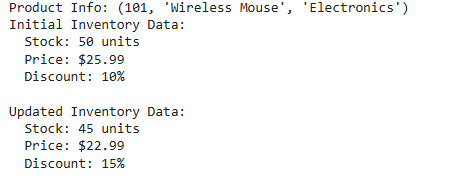

# Python Sets

👉Sets are used to store multiple items in a single variable.


👉Set is one of 4 built-in data types in Python used to store collections of data, the other 3 are List, Tuple, and Dictionary, all with different qualities and usage.

👉A set is a collection which is unordered, unchangeable*, and unindexed.

In [ ]:
thisset = {"apple", "banana", "cherry"}
print(thisset)

{'cherry', 'banana', 'apple'}


**Note: **
   
*   Set items are **unchangeable**, but you can remove items and add new items.

*   Sets are **unordered**, so you cannot be sure in which order the items will appear.
*   **Duplicates Not Allowed**,Sets cannot have two items with the same value.

*   Tuple is **Heterogeneous**:tuples allow mixed data types
*   The values True and 1 are considered the same value in sets, and are treated as duplicates:








    

In [ ]:
# Creating a set
my_set = {5, 2, 9, 1, 7,7}
my_set1 = {5,}
# Printing the set
print(my_set)  # Output order may vary
print(my_set1)

{1, 2, 5, 7, 9}
{5}


In [ ]:
#True and 1 is considered the same value:
#False and 0 is considered the same value:

thisset = {"apple", "banana", "cherry", True, False, 0, 1, 2}

print(thisset)

{False, True, 2, 'banana', 'apple', 'cherry'}


**Get the Length of a Set**

To determine how many items a set has, use the len() function

**type()**

Set items can be of any data type:


In [ ]:
thisset = {"apple", "banana", "cherry"}

print(len(thisset))  # size of the set
print(type(thisset)) # type as set


5
<class 'set'>


**The set() Constructor**

It is also possible to use the **set() constructor to make a set.**

In [ ]:
#set() constructor to make a set.
thisset = set(("apple", "banana", "cherry")) # note the double round-brackets
print(thisset)
print(type(thisset))

{'cherry', 'banana', 'apple'}
<class 'set'>


**Access Items in a set**

You cannot access items in a set by referring to an index or a key.

But you can loop through the set items using a for loop, or ask if a specified value is present in a set, by using the **in** keyword.


In [ ]:
thisset = {"apple", "banana", "cherry"}

for x in thisset:
  print(x)

cherry
banana
apple


In [ ]:
# Checking for Membership (in Keyword)

thisset = {"apple", "banana", "cherry"}
print("banana" in thisset)
print("banana" not in thisset)

True
False


**Add Items**

Once a set is created, you cannot change its items, but you can add new items.

In [ ]:
#Add an item to a set, using the add() method:
thisset = {"apple", "banana", "cherry"}
thisset.add("orange")
print(thisset)

{'cherry', 'orange', 'banana', 'apple'}


**Add Sets**

To add items from another set into the current set, use the **update()**method.

In [ ]:
#Add elements from tropical into thisset:
thisset = {"apple", "banana", "cherry"}
tropical = {"pineapple", "mango", "papaya"}

thisset.update(tropical)

print(thisset)


{'banana', 'apple', 'cherry', 'mango', 'papaya', 'pineapple'}


**Remove Item**

To remove an item in a set, use the **remove()**, or the **discard()** method.

In [ ]:
#Remove "banana" by using the remove() method:
thisset = {"apple", "banana", "cherry"}
thisset.remove("banana")
print(thisset)

#Remove "banana" by using the discard() method:
thisset = {"apple", "banana", "cherry"}
thisset.discard("cherry")
print(thisset)

#Remove a random item by using the pop() method:
thisset = {"apple", "banana", "cherry"}
x = thisset.pop()
print(x)


{'cherry', 'apple'}
{'banana', 'apple'}
cherry


**Join Sets**

There are several ways to join two or more sets in Python.

The **union()** and **update()** methods joins all items from both sets.

The **intersection()**method keeps ONLY the duplicates.

The **difference()**method keeps the items from the first set that are not in the other set(s).

The **symmetric_difference()** method keeps all items EXCEPT the duplicates.

In [ ]:
#The union() method returns a new set with all items from both sets

set1 = {"a", "b", "c"}
set2 = {1, 2, 3}

set3 = set1.union(set2)
print(set3)

{'a', 1, 2, 3, 'c', 'b'}


In [ ]:
# Use | to join two sets:
set1 = {"a", "b", "c"}
set2 = {1, 2, 3}

set3 = set1 | set2
print(set3)

{'a', 1, 2, 3, 'c', 'b'}


In [ ]:
#Join multiple sets with the union() method:
set1 = {"a", "b", "c"}
set2 = {1, 2, 3}
set3 = {"John", "Elena"}
set4 = {"apple", "bananas", "cherry"}

myset = set1.union(set2, set3, set4)
print(myset)


{'b', 1, 2, 3, 'John', 'bananas', 'apple', 'c', 'a', 'cherry', 'Elena'}


In [ ]:
#Use | to join two sets:
set1 = {"a", "b", "c"}
set2 = {1, 2, 3}
set3 = {"John", "Elena"}
set4 = {"apple", "bananas", "cherry"}

myset = set1 | set2 | set3 |set4
print(myset)

{'b', 1, 2, 3, 'John', 'bananas', 'apple', 'c', 'a', 'cherry', 'Elena'}


In [ ]:
#Intersection:Join set1 and set2, but keep only the duplicates:
set1 = {"apple", "banana", "cherry"}
set2 = {"google", "microsoft", "apple"}

set3 = set1.intersection(set2)
print(set3)

{'apple'}


In [ ]:
#Use & to join two sets:Intersection
set1 = {"apple", "banana", "cherry"}
set2 = {"google", "microsoft", "apple"}

set3 = set1 & set2
print(set3)

{'apple'}


In [ ]:
#difference():Keep all items from set1 that are not in set2:
set1 = {"apple", "banana", "cherry"}
set2 = {"google", "microsoft", "apple"}

set3 = set1.difference(set2)

print(set3)

{'cherry', 'banana'}


In [ ]:
#Symmetric Differences:Keep the items that are not present in both sets:
set1 = {"apple", "banana", "cherry"}
set2 = {"google", "microsoft", "apple"}
set3 = set1.symmetric_difference(set2)
print(set3)

{'banana', 'microsoft', 'cherry', 'google'}


** quiz**


[👉] https://www.w3schools.com/python/exercise.asp?x=xrcise_sets1
https://www.w3schools.com/python/exercise.asp?x=xrcise_sets1

# **Work with dates and times**


In Python, you can work with dates and times using the **datetime** module. The datetime module provides classes for manipulating dates and times, including **date, time, datetime, and timedelta** objects.

In [ ]:
import datetime
#Getting the Current Date and Time
now = datetime.datetime.now()
print(now)  # Prints the current date and time (e.g., 2025-01-30 12:45:59.237247)

#Getting the Current Date: To get only the current date (without time):
today = datetime.date.today()
print(today)  # Prints the current date (e.g., 2025-01-30)


2025-02-02 17:01:28.288904
2025-02-02


In [ ]:
#import datetime:You can also create specific date or time objects:

import datetime
# Creating a specific date
my_date = datetime.date(2025, 1, 30)
print(my_date)  # Output: 2025-01-30

# Creating a specific time
my_time = datetime.time(12, 30, 45)
print(my_time)  # Output: 12:30:45


2025-01-30
12:30:45


**Formatting Dates and Times**

You can format dates and times into strings using the **strftime()** method:

**Common format codes:**

%Y: Year with century (e.g., 2025)

%m: Month as a zero-padded decimal number (e.g., 01)

%d: Day of the month as a zero-padded decimal number (e.g., 30)

%H: Hour (24-hour clock) as a zero-padded decimal number (e.g., 12)

%M: Minute as a zero-padded decimal number (e.g., 45)

%S: Second as a zero-padded decimal number (e.g., 59)


In [ ]:
import datetime
now = datetime.datetime.now()
formatted_date = now.strftime("%Y-%m-%d %H:%M:%S")
print(formatted_date)  # Output: 2025-01-30 12:45:59


2025-02-02 17:01:28


** Working with Timedelta**

The timedelta class represents the difference between two dates or times.

In [ ]:
# Create a timedelta object
delta = datetime.timedelta(days=5, hours=3)

# Get the current date and time
now = datetime.datetime.now()

# Add the timedelta to the current date
new_date = now + delta
print(new_date)  # Output: (current date + 5 days and 3 hours)


2025-02-07 20:01:28.789001


**Calculating Date Difference**

 To find the difference between two dates:



In [ ]:
date1 = datetime.date(2025, 1, 30)
date2 = datetime.date(2025, 2, 5)

difference = date2 - date1
print(difference)  # Output: 6 days, meaning 6 days between the two dates


6 days, 0:00:00


**Question:**

Write a Python program that calculates a person's age based on their birthdate.


The program should ask the user to input their birthdate in the format YYYY-MM-DD.

It should then calculate the person's age in years and handle invalid date formats gracefully by displaying an appropriate error message.

If the birthdate has not yet occurred this year, adjust the age accordingly.

In [ ]:
from datetime import datetime

# Function to calculate age from birthdate
def calculate_age(birthdate):
    today = datetime.today()
    age = today.year - birthdate.year

    # Adjust age if birthday hasn't occurred yet this year
    if (today.month, today.day) < (birthdate.month, birthdate.day):
        age -= 1

    return age

# Ask user for their birthday
birthdate_str = input("Enter your birthdate (YYYY-MM-DD): ")

# Convert the input string to a datetime object
try:
    birthdate = datetime.strptime(birthdate_str, "%Y-%m-%d")
    # Calculate and print the age
    age = calculate_age(birthdate)
    print(f"Your age is: {age} years")
except ValueError:
    print("Invalid date format. Please use YYYY-MM-DD.")


# Python Dictionaries

Dictionaries are used to store data values in key:value pairs.

A dictionary is a collection which is

*   ordered
*   changeable
*   do not allow duplicates.

Dictionaries are written with curly brackets, and have keys and values:

Example
[Note:
As of Python version 3.7, dictionaries are ordered. In Python 3.6 and earlier, dictionaries are unordered.]







In [ ]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
print(thisdict)


{'brand': 'Ford', 'model': 'Mustang', 'year': 1964}


**Dictionary Items**

Dictionary items are presented in key:value pairs, and can be referred to by using the key name.

In [ ]:
#Print the "brand" value of the dictionary:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
print(thisdict["year"])
print(thisdict["brand"])
print(thisdict["model"])


1964
Ford
Mustang


**Duplicates Not Allowed**

Dictionaries cannot have two items with the same key: Duplicate values will overwrite existing values:


In [ ]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964,
  "year": 2020
}
print(thisdict)

{'brand': 'Ford', 'model': 'Mustang', 'year': 2020}


**dict()Constructor**

It is also possible to use the **dict()** constructor to make a dictionary


In [ ]:
thisdict = dict(name = "John", age = 36, country = "Norway")
print(thisdict)

{'name': 'John', 'age': 36, 'country': 'Norway'}


**Dictionary Length**

In [ ]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 2020
}
print(len(thisdict))

3


**type()**

From Python's perspective, dictionaries are defined as objects with the data type 'dict':

In [ ]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 2020
}
print(type(thisdict))
print(type(thisdict["brand"]))
print(type(thisdict["model"]))
print(type(thisdict["year"]))

<class 'dict'>
<class 'str'>
<class 'str'>
<class 'int'>


**Dictionary Items - Data Types**

The values in dictionary items can be of any data type:

In [ ]:
#String, int, boolean, and list data types:
thisdict = {
  "brand": "Ford",
  "electric": False,
  "year": 1964,
  "colors": ["red", "white", "blue"]
}
print(type(thisdict["colors"]))

<class 'list'>


**Accessing Items**


You can access the items of a dictionary by referring to its  **key name, inside square brackets:**

In [ ]:
#Get the value of the "model" key:

thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
x = thisdict["model"]
print(x)

Mustang


**Get Keys**

In [ ]:
#Get Keys:The keys() method will return a list of all the keys in the dictionary.
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
x = thisdict.keys()
print(x)

dict_keys(['brand', 'model', 'year'])


**Change Values** or **Replacing Values**

You can change the value of a specific item by referring to its key name:

In [ ]:
#Change the "year" to 2018:

thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
thisdict["year"] = 2018
print(thisdict)

{'brand': 'Ford', 'model': 'Mustang', 'year': 2018}


In [ ]:
#Update the "year" of the car by using the update() method:

thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
thisdict.update({"year": 2020})
print(thisdict)

{'brand': 'Ford', 'model': 'Mustang', 'year': 2020}


**Adding Items**

Adding an item to the dictionary is done by using a new index key and assigning a value to it:

In [ ]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
thisdict["color"] = "red"            #add
thisdict.update({"cost": "10000$"})  #update
print(thisdict)

{'brand': 'Ford', 'model': 'Mustang', 'year': 1964, 'color': 'red', 'cost': '10000$'}


**Removing Items**

There are several methods to remove items from a dictionary:

In [ ]:
#The pop() method removes the item with the specified key name:

thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
thisdict.pop("model")
print(thisdict)

{'brand': 'Ford', 'year': 1964}


In [ ]:
#The popitem() method removes the last inserted item (in versions before 3.7, a random item is removed instead):

thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
thisdict.popitem()
print(thisdict)

{'brand': 'Ford', 'model': 'Mustang'}


In [ ]:
#The del keyword removes the item with the specified key name:

thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
del thisdict["model"]
print(thisdict)

{'brand': 'Ford', 'year': 1964}


In [ ]:
#The clear() method empties the dictionary:

thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
thisdict.clear()
print(thisdict)

{}


# **Traversing a Dictionary**

You can loop through a dictionary using a for loop.

Iterating through keys:

In [ ]:
#Iterating through keys:
student = {
    "name": "Arun",
    "age": 20,
    "course": "Computer Science"
}

print("Traversing Keys:")
for key in student:
    print(key)

Traversing Keys:
name
age
course


**Iterating Over Values**

You can use .values() to access only the values.

In [ ]:
#Iterating Over Values
student = {
    "name": "Arun",
    "age": 20,
    "course": "Computer Science"
}

print("Traversing Values:")
for value in student.values():
    print(value)


Traversing Values:
Arun
20
Computer Science


**Iterating Over Key-Value Pairs**


Using .items(), you can access both keys and values.

In [ ]:
#Iterating Over Values
student = {
    "name": "Arun",
    "age": 20,
    "course": "Computer Science"
}
print("Traversing Key-Value Pairs:")
for key, value in student.items():
    print(f"{key}: {value}")

Traversing Key-Value Pairs:
name: Arun
age: 20
course: Computer Science


**Using enumerate() for Indexed Traversal**

If you need an index while iterating, use **enumerate().**

In [ ]:
#enumerate() for Indexed Traversal
student = {
    "name": "Arun",
    "age": 20,
    "course": "Computer Science"
}

print("Indexed Traversal:")
for index, (key, value) in enumerate(student.items()):
    print(f"{index}. {key}: {value}")


Indexed Traversal:
0. name: Arun
1. age: 20
2. course: Computer Science


***Reverse Lookup***

Given a dictionary **d** and a key **k**, it is easy to find the corresponding value **v = d[k]**. This operation is called a **lookup.**

But what if you have **v** and you want to find **k**?

You have two problems:

1. First, there might be more than one key that maps to the value v. Depending on the application, you might be able to pick one, or you might have to make a list that contains all of them.

2. Second, there is no simple syntax to do a reverse lookup; you have to search.

The reverse_lookup function:

Searches for all keys in name_dictionary that map to name_value and returns them as a list.

If no match is found, it returns an empty list

In [ ]:
# Reverse Lookup (to find the key for a value)

def reverse_lookup(name_dictionary, name_value): # dictionary and value for the key
    keys = []  # Initialize an empty list to store keys
    for k in name_dictionary:
        if name_dictionary[k] == name_value:
            keys.append(k)  # Append the key to the list if the value matches
    return keys  # Return the list of keys

name_dictionary = {'Alice': 90, 'Bob': 85, 'Charlie': 90, 'David': 80}
print(reverse_lookup(name_dictionary, 90))  # Output: ['Alice', 'Charlie']
print(reverse_lookup(name_dictionary, 100))  # Output: []

['Alice', 'Charlie']
[]
